<img src="../../../../images/svr.png" style="background:white; display: block; margin-left: auto;margin-right: auto; width:60%"/>

---
<h2>1. Importing the Dataset</h2>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../../data/clean/Position_Salaries.csv')
display(df.head())
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values.reshape(len(df.iloc[:, -1].values),1) # transform y to 2D array like x variable

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


---
<h2>2. Feature Scaling</h2>

In [2]:
from sklearn.preprocessing import StandardScaler

stand_x = StandardScaler().fit(x)
stand_y = StandardScaler().fit(y)
x_ss = stand_x.transform(x)
y_ss = stand_y.transform(y)

---
<h2>3. Training the Model with the Whole Dataset</h2>

In [3]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf', degree=3, gamma="scale",  # rbf kernel is for non-linear regression
              coef0=0.0, tol=0.001, C=1.0, epsilon=0.1)
svr_reg.fit(x_ss, y_ss)

SVR()

---
<h2>4. Visualizing the Model Results</h2>

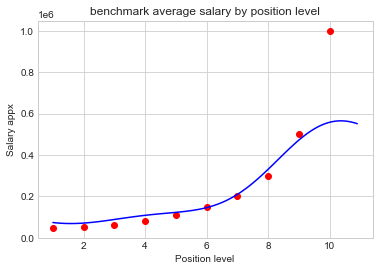

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

regression_x = np.arange(1, x.max()+1, 0.1)
regression_y = [stand_y.inverse_transform(svr_reg.predict(stand_x.transform([[i]])))[0] for i in regression_x]

ax.scatter(x, y, color='red')
ax.plot(regression_x, regression_y, color='blue')
ax.set_xlabel("Position level")
ax.set_ylabel("Salary appx")
ax.set_title("benchmark average salary by position level")

plt.show()

---
<h2>5. Prediction of Possible Salary based on Position Level as Input</h2>

In [5]:
post_lvl = 6.5
y_pred = svr_reg.predict(stand_x.transform([[6.5]]))
y_pred_unscale = stand_y.inverse_transform(y_pred)

print("The salary estimate for for position level at {} is ${:,.2f}".format(post_lvl, y_pred_unscale[0]))

The salary estimate for for position level at 6.5 is $170,370.02
